##Imports

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2,decode_predictions, preprocess_input  #Instância a arquitetura InceptionResNetv2

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as pre_vgg
from keras.applications.vgg19 import decode_predictions as decode_vgg

from IPython.core.display import display

Constants

In [ ]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'
FILE_4 = '04 Horse.jpg'
FILE_5 = '05 City.jpg'
FILE_6 = '06 Feet.jpg'
FILE_7 = '07 Stairs.jpg'
FILE_8 = '08 Doorway.jpg'
FILE_9 = '09 Ice Cream.jpg'
FILE_10 = '10 Red Shoes.jpg'
FILE_11 = '11 Shoe.jpg'

Preprocessing Images

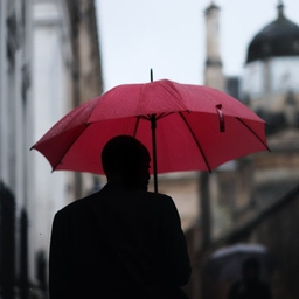

In [ ]:
pic = load_img(FILE_1,target_size=(299,299)) #target resolution

display(pic)

In [ ]:
pic_array = img_to_array(pic) #Array 256x 256 com 3 canais
pic_array.shape

(299, 299, 3)

In [ ]:
expanded = np.expand_dims(pic_array,axis=0)  #Preciso adicionar mais uma dimensão, e ela vai se referir a qual imagem vou usar.
expanded.shape

(1, 299, 299, 3)

In [ ]:
preprocessed= preprocess_input(expanded) # Format the data in the way the model expects

In [ ]:
def format_img_inceptionresnet(file):
    pic=load_img(file,target_size=(299,299))
    array=img_to_array(pic)
    expanded=np.expand_dims(array,axis=0)

    return preprocess_input(expanded)


In [ ]:
def format_img_vgg(file):
    pic=load_img(file,target_size=(224,224))
    array=img_to_array(pic)
    expanded=np.expand_dims(array,axis=0)

    return pre_vgg(expanded)

Function that load the image in default resolution for Inception Res, convert to array, and return preprocessed image for InceptionResNetv2

Load Inception ResNet

In [ ]:
%%time
#arquitetura- rede neural inception resnet
inception_model = InceptionResNetV2(weights='imagenet')

225209952/225209952 [==============================] - 11s 0us/step
CPU times: user 7.92 s, sys: 1.31 s, total: 9.23 s
Wall time: 21.5 s


In [ ]:
inception_model.graph = tf.Graph()
inception_model.graph.as_default()

Making Prediction

In [ ]:
prediction = inception_model.predict(preprocessed)  #Preciso adicionar mais uma dimensão, porque vai se referir a qual imagem vou usar. RAW OUTPUT FOR OUR PREDICTION

decode_predictions(prediction)
#RAW OUTPUT FOR OUR PREDICTION

#OUTPUT
#top 5 predictions,
#(class name, classs description, probability)
#wrong: data is not formatted in the way model expects to be.

1/1 [==============================] - 0s 38ms/step


[[('n03729826', 'matchstick', 0.11614624),
  ('n03196217', 'digital_clock', 0.09504732),
  ('n01930112', 'nematode', 0.08122748),
  ('n03590841', "jack-o'-lantern", 0.028692227),
  ('n04286575', 'spotlight', 0.020214839)]]

#FILE_2

In [ ]:
prepros=format_img_inceptionresnet(FILE_2)

1/1 [==============================] - 0s 38ms/step


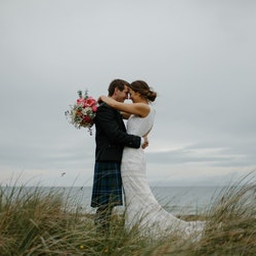

[[('n10148035', 'groom', 0.6060555),
  ('n03450230', 'gown', 0.17247109),
  ('n11879895', 'rapeseed', 0.02201901),
  ('n09421951', 'sandbar', 0.017883284),
  ('n03534580', 'hoopskirt', 0.011139472)]]

In [ ]:
prediction=inception_model.predict(prepros)

display(load_img(FILE_2))
decode=decode_predictions(prediction)
decode

#FILE_5

1/1 [==============================] - 0s 128ms/step


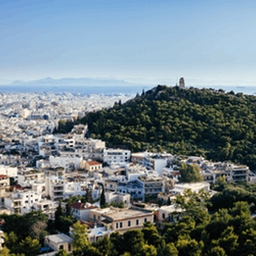

[[('n09193705', 'alp', 0.31865558),
  ('n09468604', 'valley', 0.258954),
  ('n09332890', 'lakeside', 0.04298893),
  ('n09428293', 'seashore', 0.04182958),
  ('n09246464', 'cliff', 0.033339143)]]

In [ ]:
prepros=format_img_inceptionresnet(FILE_5)
prediction=inception_model.predict(prepros)

display(load_img(FILE_5))
decode=decode_predictions(prediction)
decode

#File_3

In [ ]:
ocean_prep=format_img_inceptionresnet(FILE_3)

1/1 [==============================] - 0s 37ms/step


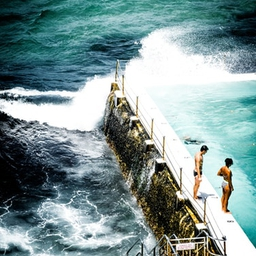

[[('n04347754', 'submarine', 0.3920193),
  ('n02894605', 'breakwater', 0.27252486),
  ('n02814860', 'beacon', 0.044939406),
  ('n03662601', 'lifeboat', 0.033300605),
  ('n03160309', 'dam', 0.0139852455)]]

In [ ]:
ocean_pred= inception_model.predict(ocean_prep)

display(load_img(FILE_3))
ocean_decode= decode_predictions(ocean_pred)
ocean_decode

##Testing the VGG 19 Model

Using VGG 19 Model from Keras with the ImageNet weights to make a prediction on several of the sample images. VGG 19 Data processing. Prediction.

In [ ]:
%%time
#arquitetura- rede neural VGG 19 Visual geometric group
vgg_model= VGG19(weights='imagenet')

574710816/574710816 [==============================] - 26s 0us/step
CPU times: user 4.14 s, sys: 2.37 s, total: 6.51 s
Wall time: 29.2 s


In [ ]:
data = format_img_vgg(FILE_3)
pred_vgg = vgg_model.predict(data)

decode_v= decode_vgg(pred_vgg)
decode_v

1/1 [==============================] - 0s 39ms/step


[[('n04347754', 'submarine', 0.18223244),
  ('n02894605', 'breakwater', 0.12564299),
  ('n09399592', 'promontory', 0.08675324),
  ('n02981792', 'catamaran', 0.08607837),
  ('n03662601', 'lifeboat', 0.08517043)]]

1/1 [==============================] - 0s 19ms/step


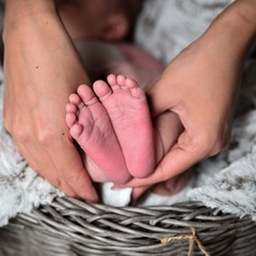

[[('n07880968', 'burrito', 0.3335576),
  ('n01817953', 'African_grey', 0.109056294),
  ('n03992509', "potter's_wheel", 0.048200745),
  ('n07860988', 'dough', 0.037284408),
  ('n01748264', 'Indian_cobra', 0.02673402)]]

In [ ]:
data = format_img_vgg(FILE_6)
pred_vgg = vgg_model.predict(data)

decode_v= decode_vgg(pred_vgg)
display(load_img(FILE_6))
decode_v